In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Plotting Functions

In [15]:
def visualize_rates(data, fpr=True, category='Accent', model_name='Res-TSSDNet'):
    # Determine the value name based on the fpr flag:
    value_name = 'FPR' if fpr else 'TNR'

    # Reshape the data for plotting:
    df_melted = data.melt(
        id_vars=[category],
        value_vars=['Baseline', 'Fine-Tuned'],
        var_name='Evaluation Results',
        value_name=value_name
    )

    # Match colors to our presentation (but feel free to change):
    # custom_palette = {
    #     'Baseline': '#3a9593ff',
    #     'Fine-Tuned': '#d9534fff'
    # }
    custom_palette = sns.color_palette("Set2", 2) # More color-blind friendly.
    sns.set_style("darkgrid")

    # Create the bar plot:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=category,
                y=value_name,
                hue='Evaluation Results',
                data=df_melted,
                palette=custom_palette,
                width=0.8)

    # Set plot title and labels:
    metric = "False Positive Rate" if fpr else "True Negative Rate"
    plot_title = f'{model_name} {metric} By {category}'
    plt.title(plot_title)
    plt.xlabel(category)
    plt.xticks(rotation=90)
    plt.ylabel(metric)
    plt.legend(title='Evaluation Results', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside of plots.

    # Display the plot
    plt.show()

# Res-TSSDNet Visualizations

In [16]:
accent_categories = [
    'British Isles',
    'Caribbean',
    'East Asia',
    'Middle East and Central Asia',
    'North America', 
    'South Asia',
    'Southeast Asia', 
    'Sub-Saharan Africa',
    'Western Europe'
]

,Accent,Baseline,Fine-Tuned
0,British Isles,0.98,0.79
1,Caribbean,0.88,0.94
2,East Asia,0.88,0.96
3,Middle East and Central Asia,0.83,0.96
4,North America,0.93,0.70


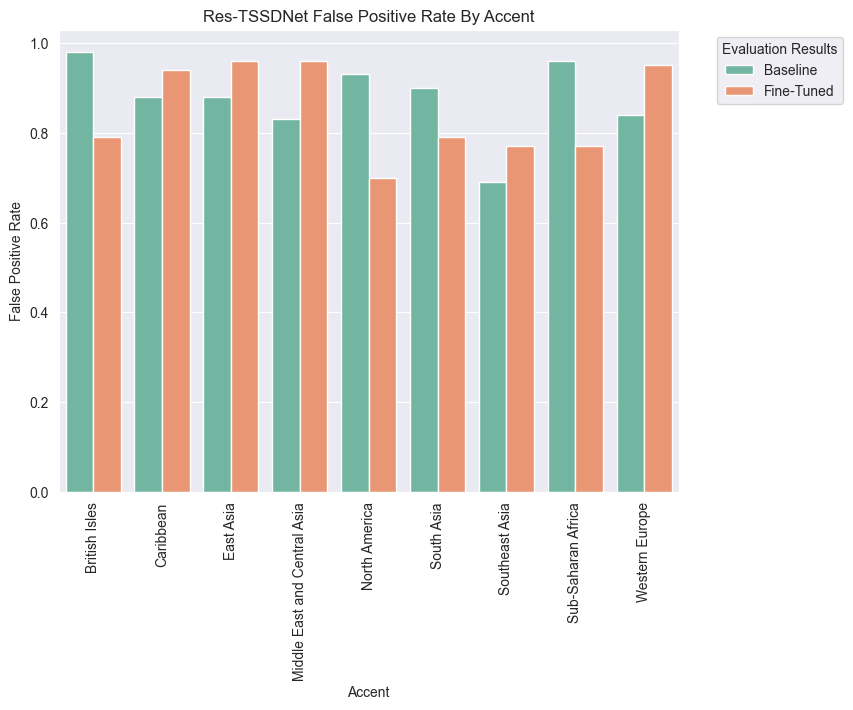

In [17]:
# Accent FPRs
accent_fpr_data = {
    'Accent': accent_categories,
    'Baseline': [0.98, 0.88, 0.88, 0.83, 0.93, 0.90, 0.69, 0.96, 0.84],
    'Fine-Tuned': [0.79, 0.94, 0.96, 0.96, 0.70, 0.79, 0.77, 0.77, 0.95]
}
accent_fpr_data = pd.DataFrame(accent_fpr_data)
display(accent_fpr_data.head(5))
visualize_rates(data=accent_fpr_data,
                fpr=True,
                category='Accent',
                model_name='Res-TSSDNet')

,Accent,Baseline,Fine-Tuned
0,British Isles,0.02,0.21
1,Caribbean,0.12,0.06
2,East Asia,0.12,0.04
3,Middle East and Central Asia,0.16,0.03
4,North America,0.07,0.30


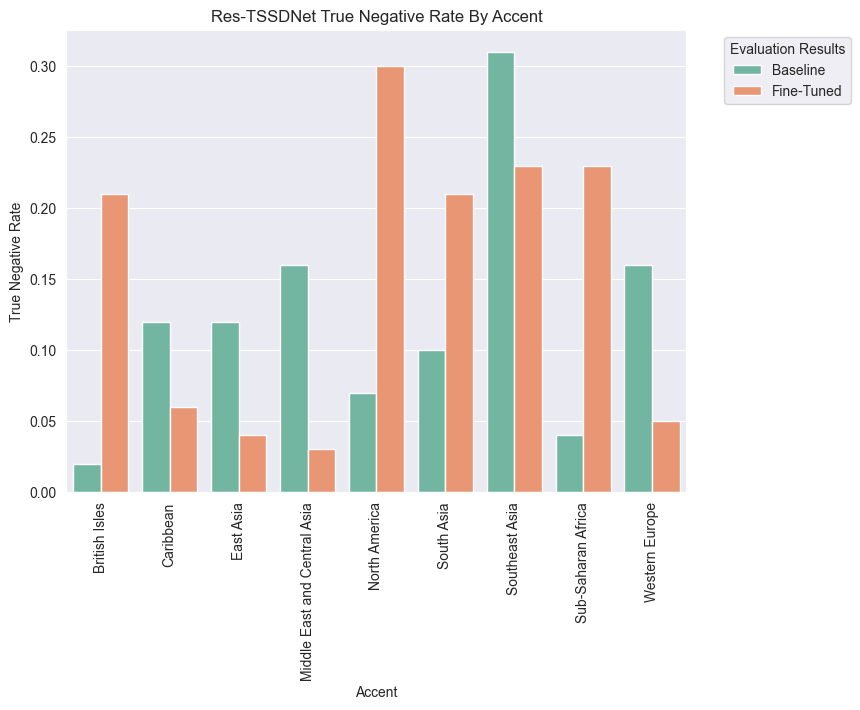

In [18]:
# Accent TNRs
accent_tnr_data = {
    'Accent': accent_categories,
    'Baseline': [0.02, 0.12, 0.12, 0.16, 0.07, 0.10, 0.31, 0.04, 0.16],
    'Fine-Tuned': [0.21, 0.06, 0.04, 0.03, 0.30, 0.21, 0.23, 0.23, 0.05]
}
accent_tnr_data = pd.DataFrame(accent_tnr_data)
display(accent_tnr_data.head(5))
visualize_rates(data=accent_tnr_data,
                fpr=False,
                category='Accent',
                model_name='Res-TSSDNet')

,Gender,Baseline,Fine-Tuned
0,Female,0.798206,0.818386
1,Male,0.957399,0.876682


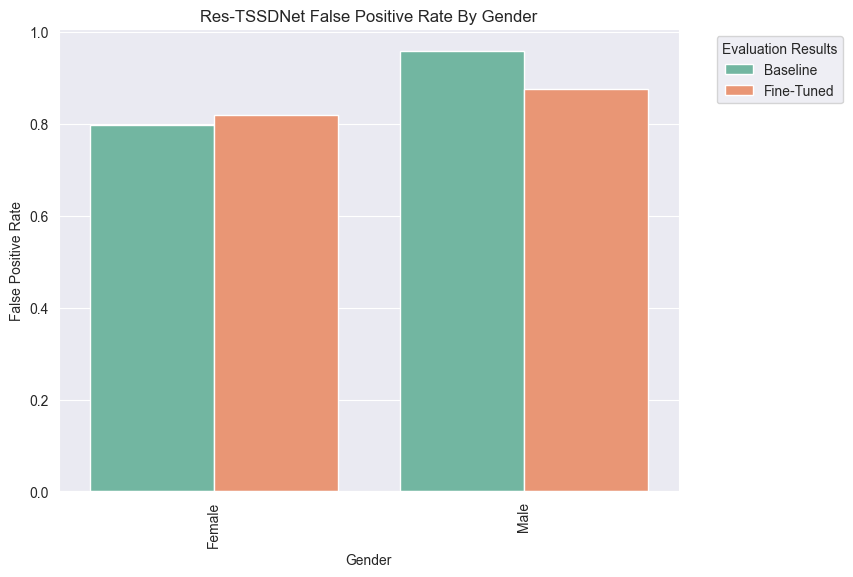

In [20]:
# # Gender FPRs
gender_fpr_data = {
    'Gender': ['Female', 'Male'],
    'Baseline': [0.798206, 0.957399],
    'Fine-Tuned': [0.818386, 0.876682]
}
gender_fpr_data = pd.DataFrame(gender_fpr_data)
display(gender_fpr_data.head(5))
visualize_rates(data=gender_fpr_data,
                fpr=True,
                category='Gender',
                model_name='Res-TSSDNet')

,Gender,Baseline,Fine-Tuned
0,Female,0.201794,0.181614
1,Male,0.042601,0.123318


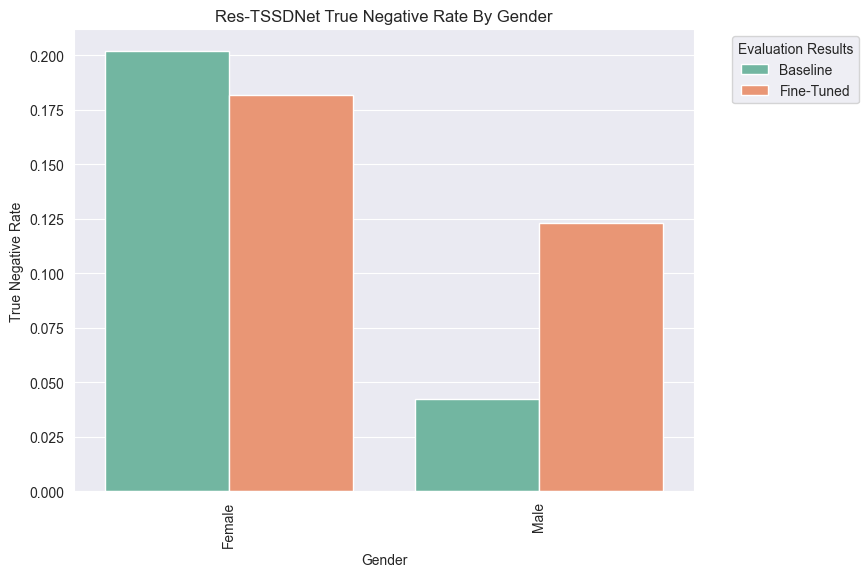

In [19]:
# # Gender TNRs
gender_tnr_data = {
    'Gender': ['Female', 'Male'],
    'Baseline': [0.201794, 0.042601],
    'Fine-Tuned': [0.181614, 0.123318]
}
gender_tnr_data = pd.DataFrame(gender_tnr_data)
display(gender_tnr_data.head(5))
visualize_rates(data=gender_tnr_data,
                fpr=False,
                category='Gender',
                model_name='Res-TSSDNet')